In [314]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [315]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
# Convert labels to -1 and 1
y = np.where(y == 0, -1, 1)
print(x)
print(y)

[[ 0.16169213 -4.09370438]
 [ 5.84509371  9.13749943]
 [ 0.51082741 -3.91776057]
 [ 8.57479316 -4.02692169]
 [ 6.09753476  9.83165003]
 [ 6.97685345 11.09849954]
 [ 1.60443385 -4.93631783]
 [ 9.41720967 -1.81142842]
 [ 9.05383127 -2.61986472]
 [ 9.11202535 -3.59094029]
 [ 2.79368848 -3.71783067]
 [ 9.03638546 -1.73752575]
 [ 8.92195171 -2.38086316]
 [ 5.9017379   9.00108555]
 [ 2.22356101 -2.84040681]
 [ 3.18632101 -2.70543376]
 [ 6.62231486 -1.60639658]
 [ 7.28222448  8.30656828]
 [ 5.55012627  7.93944664]
 [ 5.63839531 10.32113978]
 [ 4.5762286  10.72101261]
 [ 4.65150941 10.00434089]
 [ 5.47606111  9.55746268]
 [ 5.93589122 12.11755091]
 [ 2.07851465 -4.89146531]
 [ 8.85815896 -1.83731891]
 [ 8.45349277 -2.89565379]
 [ 9.51869772 -2.34377128]
 [ 6.11409544  9.12170174]
 [ 5.75343674 10.22685497]
 [ 8.64002616 -0.46626885]
 [ 4.41000894  9.22780503]
 [12.64139481 -3.89698525]
 [ 8.34775689 -3.08339296]
 [ 5.558941    8.60759727]
 [ 2.26328291 -1.23541867]
 [11.52418025 -0.1937112 ]
 

In [316]:
tuple_data = np.array(x)
print(tuple_data)
tuple_label = y
print(tuple_label)

[[ 0.16169213 -4.09370438]
 [ 5.84509371  9.13749943]
 [ 0.51082741 -3.91776057]
 [ 8.57479316 -4.02692169]
 [ 6.09753476  9.83165003]
 [ 6.97685345 11.09849954]
 [ 1.60443385 -4.93631783]
 [ 9.41720967 -1.81142842]
 [ 9.05383127 -2.61986472]
 [ 9.11202535 -3.59094029]
 [ 2.79368848 -3.71783067]
 [ 9.03638546 -1.73752575]
 [ 8.92195171 -2.38086316]
 [ 5.9017379   9.00108555]
 [ 2.22356101 -2.84040681]
 [ 3.18632101 -2.70543376]
 [ 6.62231486 -1.60639658]
 [ 7.28222448  8.30656828]
 [ 5.55012627  7.93944664]
 [ 5.63839531 10.32113978]
 [ 4.5762286  10.72101261]
 [ 4.65150941 10.00434089]
 [ 5.47606111  9.55746268]
 [ 5.93589122 12.11755091]
 [ 2.07851465 -4.89146531]
 [ 8.85815896 -1.83731891]
 [ 8.45349277 -2.89565379]
 [ 9.51869772 -2.34377128]
 [ 6.11409544  9.12170174]
 [ 5.75343674 10.22685497]
 [ 8.64002616 -0.46626885]
 [ 4.41000894  9.22780503]
 [12.64139481 -3.89698525]
 [ 8.34775689 -3.08339296]
 [ 5.558941    8.60759727]
 [ 2.26328291 -1.23541867]
 [11.52418025 -0.1937112 ]
 

In [317]:
# Number of rows
x_rows = len(x)

# Number of columns (assuming all rows have the same length)
x_columns = len(x[0])

y_shape = y.shape

# Print the shape
print("Shape of the Feature tuple is (rows, columns):", (x_rows, x_columns))
print("Shape of the label is:", y_shape)

Shape of the Feature tuple is (rows, columns): (100, 2)
Shape of the label is: (100,)


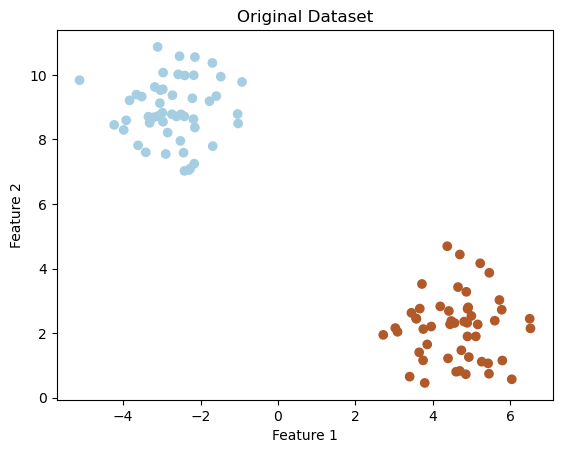

In [318]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Dataset')
plt.show()

In [338]:
class LinearSVM:
    def __init__(self, learning_rate=0.01, lambda_parameter=0.01, iterations=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_parameter
        self.n_iters = iterations
        self.w = None
        self.b = None
        self.support_vectors = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        hyperparameter = np.zeros(n_samples)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    hyperparameter[idx] += 1
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

        self.support_vectors = X[hyperparameter > 0]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)
   
    def decision_function(self, X):
        return np.dot(X, self.w) - self.b

In [339]:
# Train Linear SVM model
svm = LinearSVM()
svm.fit(X, y)

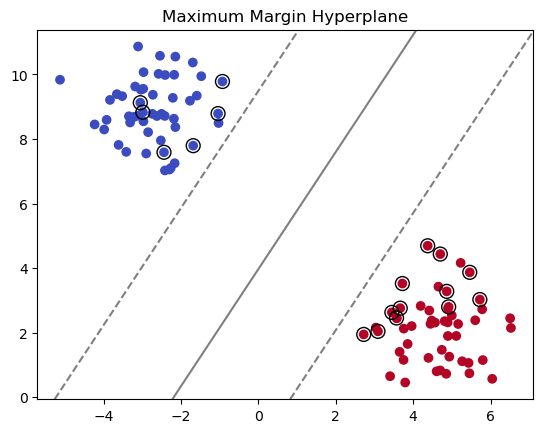

In [344]:
# Step 3: Plot dataset and maximum margin separating hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(svm.support_vectors[:, 0], svm.support_vectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title('Maximum Margin Hyperplane')
plt.show()

In [347]:
# Step 4: Remove closest support vector
# Find index of closest support vector
distances = svm.decision_function(X)
closest_sv_index = np.argmin(np.abs(distances))

# Remove closest support vector
X_filtered = np.delete(X, closest_sv_index, axis=0)
y_filtered = np.delete(y, closest_sv_index, axis=0)

# Step 5: Retrain SVM model and plot new maximum margin separating hyperplane
svm.fit(X_filtered, y_filtered)

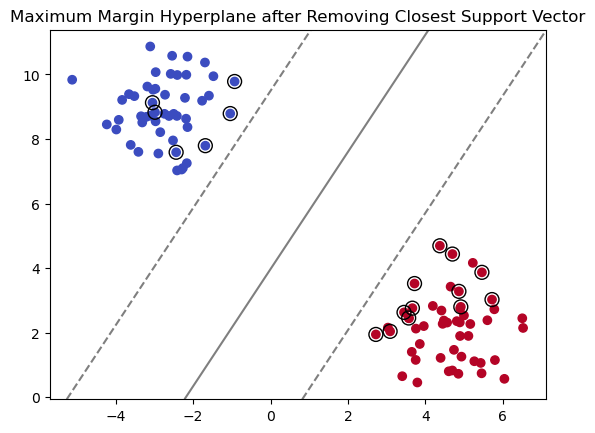

In [348]:
# Plot dataset and maximum margin separating hyperplane after removing closest support vector
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(svm.support_vectors[:, 0], svm.support_vectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title('Maximum Margin Hyperplane after Removing Closest Support Vector')
plt.show()

 Ans: 
By comparing the two plots, we can observe that the maximum margin separating hyperplane changes when we remove the closest support vector from the dataset. The new hyperplane is different from the original one, and it may have a different orientation and position. This demonstrates the sensitivity of the SVM model to the support vectors, which are the data points closest to the decision boundary. The support vectors play a crucial role in determining the maximum margin separating hyperplane, and removing even a single support vector can significantly alter the decision boundary. This highlights the importance of carefully selecting and handling the training data for SVM models to ensure robust and accurate classification performance.